# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [3]:
from DATA import MG17

data = MG17(True, [80,10,10])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## Prepare the three different pretraining

## NOT PRETRAINED RESERVOIR

In [60]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = 250, sparsity=0.9, ro_rescale=0.25, bias = True )

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [5]:
ip_reservoir = IPReservoir(N = 250, mask=IPMask.normalMask(250), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [17]:
ip_reservoir.pre_train(X_TR, eta=0.00001, epochs=15,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2595.6474609375.
- Epoch: 2) | KL Divergence value: 2590.6904296875.
- Epoch: 3) | KL Divergence value: 2586.407470703125.
- Epoch: 4) | KL Divergence value: 2582.782470703125.
- Epoch: 5) | KL Divergence value: 2579.80029296875.
- Epoch: 6) | KL Divergence value: 2577.451171875.
- Epoch: 7) | KL Divergence value: 2575.719482421875.
- Epoch: 8) | KL Divergence value: 2574.59326171875.
- Epoch: 9) | KL Divergence value: 2574.06005859375.
- Epoch: 10) | KL Divergence value: 2574.09814453125.
- Epoch: 11) | KL Divergence value: 2574.6923828125.
- Epoch: 12) | KL Divergence value: 2575.8193359375.
- Epoch: 13) | KL Divergence value: 2577.45068359375.
- Epoch: 14) | KL Divergence value: 2579.568359375.
- Epoch: 15) | KL Divergence value: 2582.140869140625.


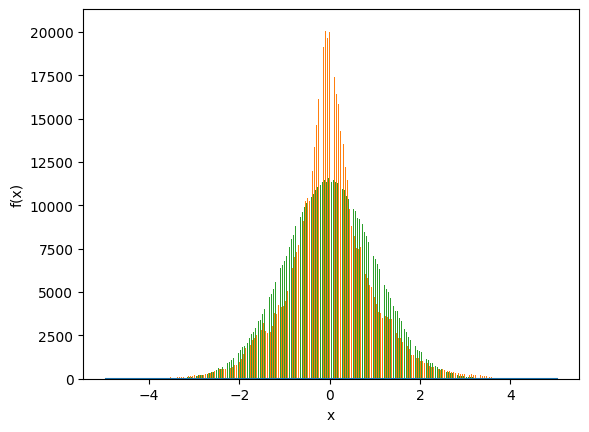

In [18]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [19]:
ip_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_VAL.shape[0], overwrite=True)

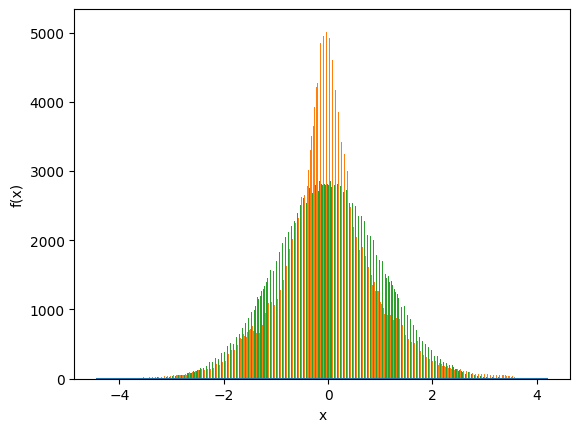

In [20]:
ip_reservoir.plot_global_neural_activity()

In [39]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (0.025725532323122025)  ACTUAL_STD == (0.10601642727851868)][ TARGET_MEAN == (0.0001296748232562095) TARGET_STD == (0.9515813589096069)]
Unit - (2): [ ACTUAL_MEAN == (-0.21303467452526093)  ACTUAL_STD == (0.44462159276008606)][ TARGET_MEAN == (0.001090444391593337) TARGET_STD == (1.0098413228988647)]
Overall network: [ACTUAL_MEAN == (0.0015238755149766803)  ACTUAL_STD == (0.913518488407135)]


## BIMODAL MIXTURE OF GAUSSIAN

In [29]:
bimodal_reservoir = IPReservoir(N = 250, mask=IPMask.mixedBimodalMask(250), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
# bimodal_reservoir.b_x = b_x
# bimodal_reservoir.b_u = b_u

In [34]:
bimodal_reservoir.pre_train(X_TR, eta=0.0000025, epochs=15,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2192.31103515625.
- Epoch: 2) | KL Divergence value: 2195.1708984375.
- Epoch: 3) | KL Divergence value: 2209.198486328125.
- Epoch: 4) | KL Divergence value: 2235.992431640625.
- Epoch: 5) | KL Divergence value: 2278.458740234375.


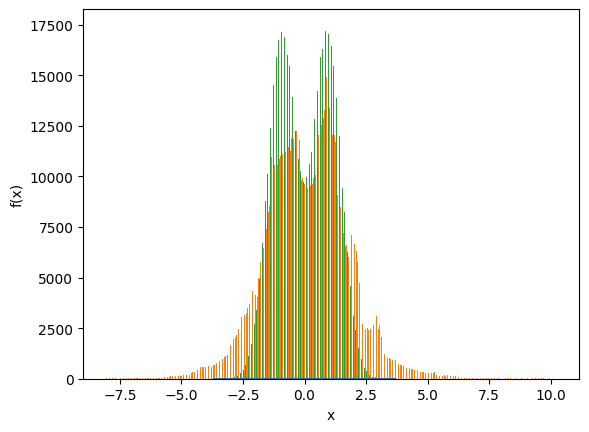

In [35]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [36]:
bimodal_reservoir.predict(X_VAL, save_gradients=False, save_states=True)
bimodal_reservoir.sample_targets(X_VAL.shape[0], overwrite=True)

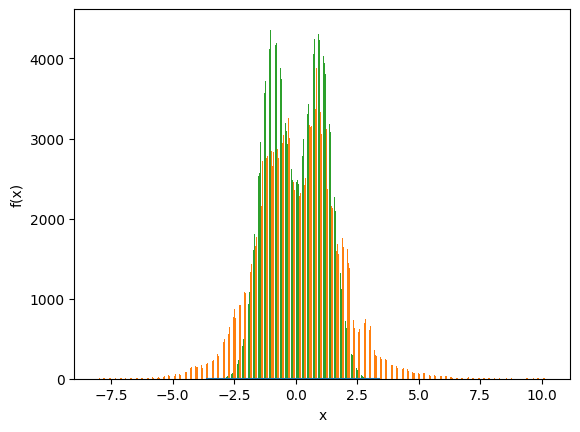

In [37]:
bimodal_reservoir.plot_global_neural_activity()

In [38]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-2.51898193359375)  ACTUAL_STD == (0.10408130288124084)][ TARGET_MEAN == (-0.951173722743988) TARGET_STD == (0.5849133133888245)]
Unit - (2): [ ACTUAL_MEAN == (1.7877798080444336)  ACTUAL_STD == (0.6003785133361816)][ TARGET_MEAN == (0.9322660565376282) TARGET_STD == (0.5722551345825195)]
Overall network: [ACTUAL_MEAN == (0.11932031065225601)  ACTUAL_STD == (1.6714178323745728)]


## EVAUALTUION IN ESN

In [41]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

from Metrics import NRMSE

### HANDMADE UGLY LAMBDA SEARCH

No transient applied. Reservoir was already warmed up
torch.Size([8000])
NORMALIZED ROOT-MEAN SQUARE ERROR: 0.9048035887428965


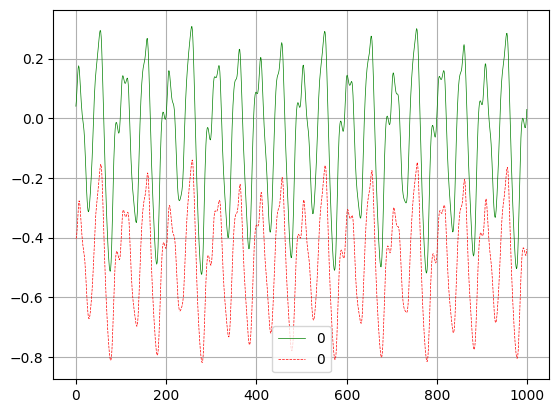

In [67]:
simple_esn.train(X_TR, Y_TR, 0.12)

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )

No transient applied. Reservoir was already warmed up
torch.Size([8000])


NORMALIZED ROOT-MEAN SQUARE ERROR: 0.7699887567380239


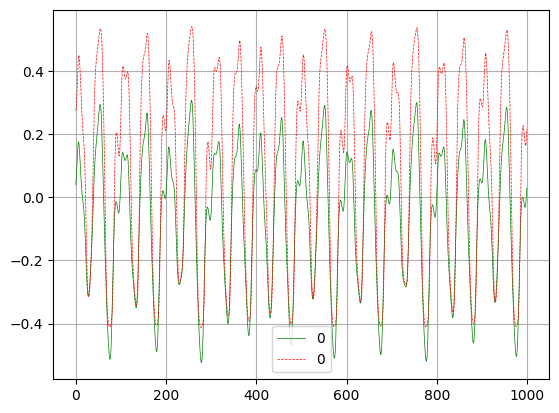

In [79]:

ip_esn.train(X_TR, Y_TR, 0.05)

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )

No transient applied. Reservoir was already warmed up
torch.Size([8000])
NORMALIZED ROOT-MEAN SQUARE ERROR: 0.7846988674926529


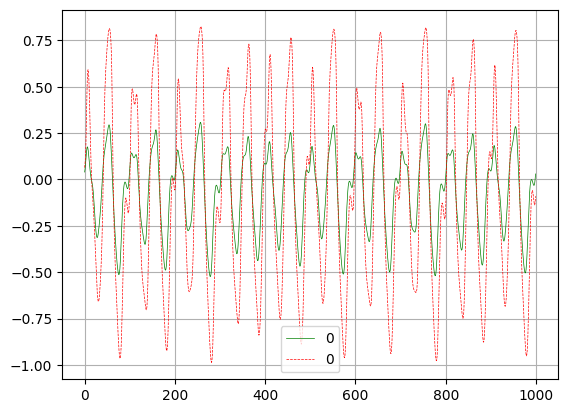

In [85]:
bimodal_esn.train(X_TR, Y_TR, 0.09)

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )

### COMPARISON ON TEST DATA

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )

In [ ]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_VAL, Y_VAL, metric=NRMSE(), plot=True)}" )